In [1]:
import matplotlib.pyplot as plt
import numpy as np

# ChRmine
irr_1p = np.array([0.01, 0.05, 0.22, 0.64, 1.42])  # mW/mm2
I_1p = np.array(
    [  # nA
        0.2886803623803128,
        2.4244584619798237,
        4.114091789682305,
        4.637010169751716,
        4.663515508375585,
    ]
)
power_2p = np.array(
    [
        1.758409161619387,
        7.759939823443684,
        18.27217199407987,
        32.8363883380391,
        50.840977407076835,
    ]
)
I_2p = np.array(
    [
        0.0677292632963725,
        0.43824699419092045,
        1.1215139595623866,
        1.8266932442474064,
        2.3784859137876424,
    ]
)
# divide by area of spot with 10 μm radius:
irr_2p = np.array(power_2p) / (np.pi * 0.01**2)

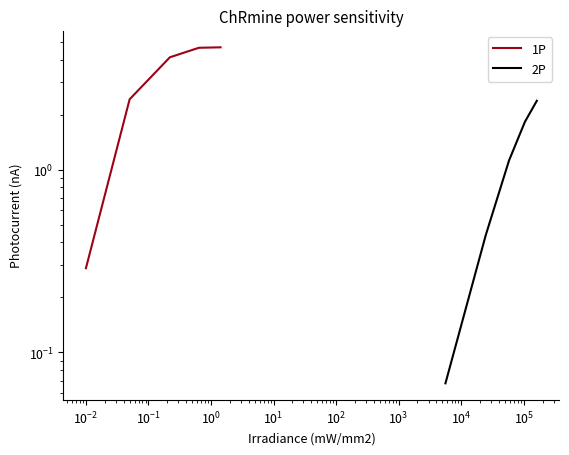

In [2]:
fig, ax = plt.subplots()
ax.loglog((irr_1p), (I_1p), c="xkcd:carmine", label="1P")
ax.plot((irr_2p), (I_2p), c="k", label="2P")
ax.set(
    xlabel="Irradiance (mW/mm2)",
    ylabel="Photocurrent (nA)",
    title="ChRmine power sensitivity",
)
ax.legend()

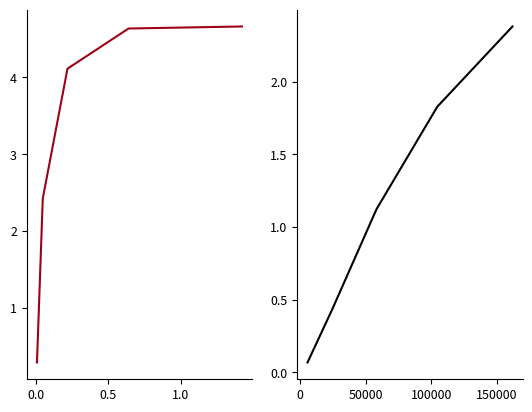

In [4]:
fig, axs = plt.subplots(1, 2)
axs[0].plot(irr_1p, I_1p, c="xkcd:carmine", label="1P")
axs[1].plot(irr_2p, I_2p, c="k", label="2P")
# ax.loglog((irr_1p), (I_1p), c="xkcd:carmine", label="1P")
# ax.plot((irr_2p), (I_2p), c="k", label="2P")
ax.set(
    xlabel="Irradiance (mW/mm2)",
    ylabel="Photocurrent (nA)",
    title="ChRmine power sensitivity",
)
ax.legend()

[0.28868036 0.33132946 0.37397855 0.41662764 0.45927673 0.50192583
 0.54457492 0.58722401 0.62987311 0.6725222  0.71517129 0.75782038
 0.80046948 0.84311857 0.88576766 0.92841676 0.97106585 1.01371494
 1.05636403 1.09901313 1.14166222 1.18431131 1.22696041 1.2696095
 1.31225859 1.35490768 1.39755678 1.44020587 1.48285496 1.52550406
 1.56815315 1.61080224 1.65345133 1.69610043 1.73874952 1.78139861
 1.82404771 1.8666968  1.90934589 1.95199498 1.99464408 2.03729317
 2.07994226 2.12259136 2.16524045 2.20788954 2.25053864 2.29318773
 2.33583682 2.37848591]


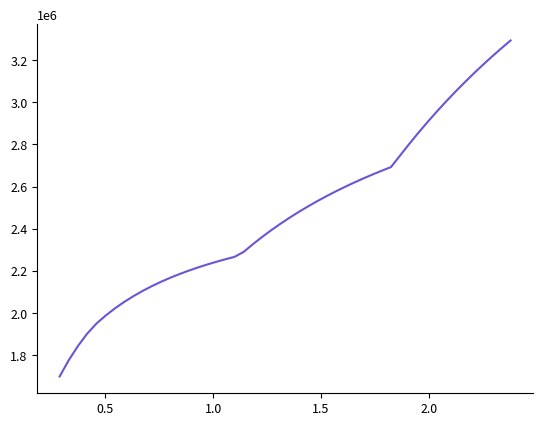

In [7]:
fig, ax = plt.subplots()
I_overlap = np.linspace(max(I_1p[0], I_2p[0]), min(I_1p[-1], I_2p[-1]))
print(I_overlap)
irr_1p_overlap = np.interp(I_overlap, I_1p, irr_1p)
irr_2p_overlap = np.interp(I_overlap, I_2p, irr_2p)
plt.plot(I_overlap, irr_2p_overlap / irr_1p_overlap)
# ax.loglog((irr_1p), (I_1p), c="xkcd:carmine", label="1P")
# ax.plot((irr_2p), (I_2p), c="k", label="2P")
# ax.set(
#     xlabel="Irradiance (mW/mm2)",
#     ylabel="Photocurrent (nA)",
#     title="ChRmine power sensitivity",
# )
# ax.legend()

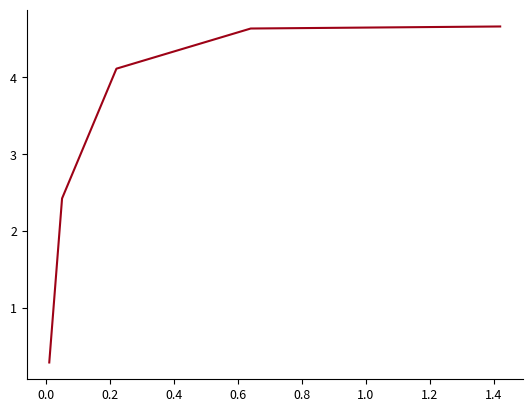

In [3]:
plt.plot((irr_1p), (I_1p), c="xkcd:carmine", label="1P")


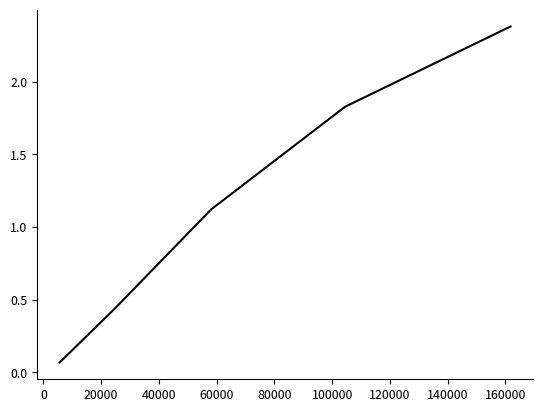

In [4]:
plt.plot((irr_2p), (I_2p), c="k", label="2P")


    RESULTS    
best_f_irr: sqrt
best_f_I: identity
best mean r2 0.703853307246795


/tmp/ipykernel_650116/3112391639.py:48: RuntimeWarning: invalid value encountered in sqrt
  I_hat_1p = f_I_inv(m1p * irr_1p_transformed)


,f_irr,f_I,r2_1p,r2_2p,mean_r2
0,identity,identity,-0.460178,0.970862,0.255342
1,identity,log,-0.596008,0.556113,-0.019947
2,identity,sqrt,-1.989953,0.494364,-0.747795
3,identity,square,0.447950,0.886708,0.667329
4,log,identity,-3.182423,0.274285,-1.454069
5,log,log,-1.775753,-0.245836,-1.010795
6,log,sqrt,-3.516459,0.411338,-1.552560
7,log,square,NaN,0.024131,NaN
8,sqrt,identity,0.506932,0.900775,0.703853
9,sqrt,log,0.171196,0.204009,0.187602


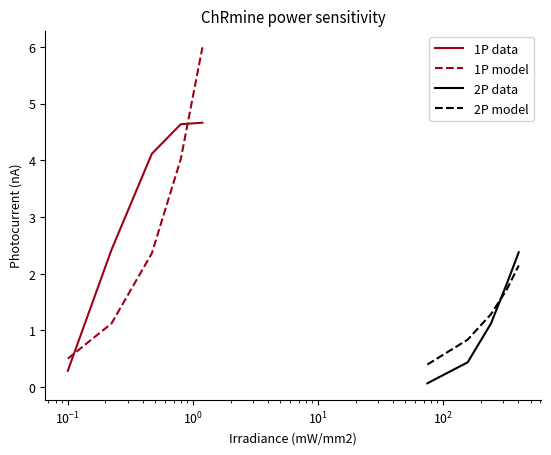

In [19]:
from itertools import product
import pandas as pd
from scipy.optimize import curve_fit


# can we get a good linear fit
def identity(x):
    return np.multiply(x, 1)


def square(x):
    return np.power(x, 2)


fns_and_invs = [
    (identity, identity),
    (np.log, np.exp),
    (np.sqrt, square),
    (square, np.sqrt),
]


def f_lin(x, m):
    return x * m


def opt(irr, I):
    opt = curve_fit(f_lin, irr, I, [1], full_output=True)
    m = opt[0][0]
    percent_resid2 = np.sum(opt[2]["fvec"] ** 2) / np.sum(I_1p_transformed**2)
    return m, percent_resid2


best_res = np.inf
best_r2 = -np.inf
df = pd.DataFrame(columns=["f_irr", "f_I", "r2_1p", "r2_2p", "mean_r2"])
for (f_irr, f_irr_inv), (f_I, f_I_inv) in product(fns_and_invs, fns_and_invs):
    irr_1p_transformed = f_irr(irr_1p)
    irr_2p_transformed = f_irr(irr_2p)
    I_1p_transformed = f_I(I_1p)
    I_2p_transformed = f_I(I_2p)

    m1p, percent_resid2_1p = opt(irr_1p_transformed, I_1p_transformed)
    m2p, percent_resid2_2p = opt(irr_2p_transformed, I_2p_transformed)
    # print(percent_resid2_1p, percent_resid2_2p)
    tot_res = np.mean([percent_resid2_1p, percent_resid2_2p])

    I_hat_1p = f_I_inv(m1p * irr_1p_transformed)
    r2_1p = 1 - np.sum((I_hat_1p - I_1p) ** 2) / np.sum((I_1p - np.mean(I_1p)) ** 2)
    # r2_1p = np.corrcoef(I_1p, I_hat_1p)[0, 1] ** 2

    I_hat_2p = f_I_inv(m2p * irr_2p_transformed)
    r2_2p = 1 - np.sum((I_hat_2p - I_2p) ** 2) / np.sum((I_2p - np.mean(I_2p)) ** 2)
    # r2_2p = np.corrcoef(I_2p, I_hat_2p)[0, 1] ** 2

    mean_r2 = np.mean([r2_1p, r2_2p])

    df.loc[len(df)] = [f_irr.__name__, f_I.__name__, r2_1p, r2_2p, mean_r2]
    # print(
    #     f"f_irr={f_irr.__name__}, f_I={f_I.__name__}, r2_1p={r2_1p:.3f}, r2_2p={r2_2p:.3f}"
    # )

    # if tot_res < best_res:
    if mean_r2 > best_r2:
        # best_res = tot_res
        best_r2 = mean_r2
        best_f_irr = f_irr
        best_f_I = f_I
        best_I_hat_1p = I_hat_1p
        best_I_hat_2p = I_hat_2p
print("\n===============")
print("    RESULTS    ")
print("===============")
print(f"best_f_irr: {best_f_irr.__name__}")
print(f"best_f_I: {best_f_I.__name__}")
# print(f"best mean resid: {best_res}")
print("best mean r2", best_r2)

fig, ax = plt.subplots()
ax.semilogx(best_f_irr(irr_1p), best_f_I(I_1p), c="xkcd:carmine", label="1P data")
ax.plot(
    best_f_irr(irr_1p),
    best_I_hat_1p,
    c="xkcd:carmine",
    linestyle="--",
    label="1P model",
)
ax.plot(best_f_irr(irr_2p), best_f_I(I_2p), c="k", label="2P data")
ax.plot(best_f_irr(irr_2p), best_I_hat_2p, c="k", linestyle="--", label="2P model")
ax.set(
    xlabel="Irradiance (mW/mm2)",
    ylabel="Photocurrent (nA)",
    title="ChRmine power sensitivity",
)
ax.legend()

df

Okay, but we do actually need a pure linear function if we want just a constant.
Let's compute that ratio to use as a placeholder for now:

In [20]:
m1p, _ = opt(irr_1p, I_1p)
m2p, _ = opt(irr_2p, I_2p)
m1p / m2p

270382.2996938772